In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [14]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)   #? is present in the data set for values not present..... -999...9 is taken to keep ? far away 
df.drop(['id'], 1, inplace=True)  #inplace=true will let changes takes place in the variable(df) itself where data is saved.
                  #inplace = false will make changes store in another variable(cf) instead of changes in df.
                # 1 is used to delete the full column otherwise 0 will delete the row
full_data = df.astype(float).values.tolist()

In [15]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [16]:
df.head()  # show 5 values from top by default

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
random.shuffle(full_data)   #divides data in training and testing set
test_size = 0.2       #0.2 is for 20%
train_set = {2:[], 4:[]} #2 & 4 is output data
test_set = {2:[], 4:[]}  #2 is for the benign tumors   4 is for malignant tumors,

train_data = full_data[:-int(test_size*len(full_data))] #  - sign = -ve indexing
test_data = full_data[-int(test_size*len(full_data)):]


In [18]:
for i in train_data:  
    train_set[i[-1]].append(i[:-1]) # i[-1] gives the label and i[:-1] gives values from start index till label.
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [19]:
def k_nearest_neighbors(data, predict, k=3): #data = complete dataset. predict takes 1 value at a time
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print(distances)
    #print(sorted(distances))
    #print(sorted(distances)[:k])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result   # 2,4

In [24]:
def accuracy(k):   # to plot a graph bw accuracy and k
    correct = 0
    total=0
    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbors(train_set, data, k)  # k value should be taken as whose 
            if group == vote: 
                correct += 1
            total += 1
    #print('Accuracy:', correct/total)
    return correct/total

c:\users\subha\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


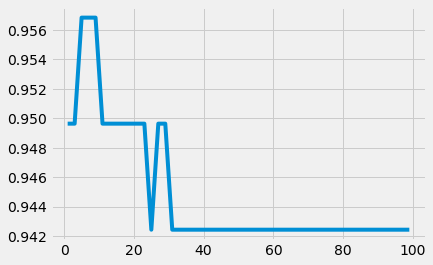

In [25]:
acc =[]
k1 =[]
for i in range(1,100,2):
    k1.append(i)
    acc.append(accuracy(i))
    
plt.plot(k1,acc)
plt.show()